In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import joblib
import pickle
import numpy as np
import seaborn as sns

**Static Analysis**
In this first step, I'm going to analyze some features in order to answer the next hypothesis, exist a differential of the permissions used between a set of malware and benign samples, in other words.

For this approach, I developed a code that consisted to extract and make a CSV file which has information about permissions of applications, through this script you can map each APK (Android Application Package) against a list of permissions.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Android_Malware_Permission_Dataset.csv to Android_Malware_Permission_Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Android_Malware_Permission_Dataset.csv", sep=",")

pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 

In [ ]:
df.head()

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.huawei.android.launcher.permission.CHANGE_BADGE,com.nbaimd.gametime.nba2011.permission.UA_DATA,com.android.browser.permission.WRITE_HISTORY_BOOKMARKS,com.cisco.anyconnect.vpn.android.permission.INTERNAL_VPN_STATE,com.huawei.launcher3.permission.WRITE_SETTINGS,android.permission.PREVENT_POWER_KEY,com.cloudmagic.mail.permission.C2D_MESSAGE,com.magazinecloner.anpt.permission.C2D_MESSAGE,android.permission.READ_MMS,CLASS
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['NAME'], axis = 1)
df = df.astype("int64")
df.CLASS.value_counts()

1    602
0    566
Name: CLASS, dtype: int64

Type is the label that represents if an application is a malware or not, as we can see this dataset is balanced.

In [ ]:
df.shape

(1168, 949)

*Let's get the top 10 of permissions that are used for our malware samples*

*Malicious*

In [ ]:
pd.Series.sort_values(df[df.CLASS==1].sum(axis=0), ascending=False)[1:11]

android.permission.INTERNET                  581
android.permission.ACCESS_NETWORK_STATE      538
android.permission.READ_PHONE_STATE          492
android.permission.WAKE_LOCK                 440
android.permission.WRITE_EXTERNAL_STORAGE    427
android.permission.RECEIVE_BOOT_COMPLETED    427
android.permission.ACCESS_WIFI_STATE         364
android.permission.SYSTEM_ALERT_WINDOW       311
android.permission.GET_TASKS                 283
android.permission.RECEIVE_SMS               279
dtype: int64

*Benign*

In [ ]:
pd.Series.sort_values(df[df.CLASS==0].sum(axis=0), ascending=False)[:10]

android.permission.INTERNET                   517
android.permission.ACCESS_NETWORK_STATE       492
android.permission.WRITE_EXTERNAL_STORAGE     401
android.permission.WAKE_LOCK                  274
android.permission.GET_ACCOUNTS               218
android.permission.ACCESS_WIFI_STATE          217
android.permission.VIBRATE                    216
android.permission.READ_PHONE_STATE           211
com.google.android.c2dm.permission.RECEIVE    180
android.permission.ACCESS_FINE_LOCATION       159
dtype: int64

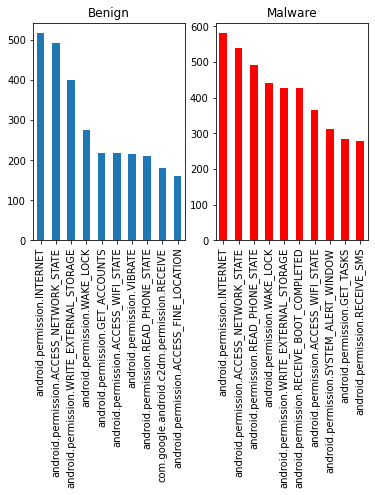

In [ ]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(ncols=2, sharex=False)

pd.Series.sort_values(df[df.CLASS==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0], title = "Benign")
pd.Series.sort_values(df[df.CLASS==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red", title = "Malware")

The last outputs allow us to get insights about a difference between the permissions used by the malware and the benign applications.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:330], df['CLASS'], test_size=0.20, random_state=42)

**Naive Bayes algorithm**

Naive Bayes is the classification machine learning algorithm that relies on the
Bayes Theorem. It can be used for both binary and multi-class classification
problems. The main point relies on the idea of treating each feature
independently. Naive Bayes method evaluates the probability of each feature
independently, regardless of any correlations, and makes the prediction based
on the Bayes Theorem. That is why this method is called ”naive” – in real-world
problems features often have some level of correlation between each other. 



In [ ]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.6452991452991453
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       196
           1       0.30      0.89      0.45        38

    accuracy                           0.65       234
   macro avg       0.63      0.75      0.59       234
weighted avg       0.86      0.65      0.69       234



**K-Nearest Neighbors**

K-Nearest Neighbors (KNN) is one of the simplest, though, accurate machine
learning algorithms. KNN is a non-parametric algorithm, meaning that it does
not make any assumptions about the data structure. In real world problems,
data rarely obeys the general theoretical assumptions, making non-parametric
algorithms a good solution for such problems. KNN model representation is as
simple as the dataset – there is no learning required, the entire training set is
stored.

In [ ]:
# kneighbors algorithm

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    # accuracy
    accuracy = accuracy_score(pred, y_test)
    print("kneighbors {}".format(i))
    print(accuracy)
    print(classification_report(pred, y_test, labels=None))
    print("")

kneighbors 3
0.8589743589743589
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       136
           1       0.79      0.91      0.84        98

    accuracy                           0.86       234
   macro avg       0.86      0.87      0.86       234
weighted avg       0.87      0.86      0.86       234


kneighbors 6
0.8461538461538461
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       145
           1       0.73      0.93      0.82        89

    accuracy                           0.85       234
   macro avg       0.84      0.86      0.84       234
weighted avg       0.87      0.85      0.85       234


kneighbors 9
0.8504273504273504
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       140
           1       0.76      0.91      0.83        94

    accuracy                           0.85       234
   macro avg       0.85      0

**Decision Tree**

As it implies from the name, decision trees are data structures that have a
structure of the tree. The training dataset is used for the creation of the tree,
that is subsequently used for making predictions on the test data. In this
algorithm, the goal is to achieve the most accurate result with the least number
of the decisions that must be made.

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier()
0.8418803418803419
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       136
           1       0.77      0.89      0.82        98

    accuracy                           0.84       234
   macro avg       0.84      0.85      0.84       234
weighted avg       0.85      0.84      0.84       234

